In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Part 1

In [2]:
# PTA algorithm
def perceptron_algorithm(features, labels, task=None):
  # initialize the weights randomly
  w_all = []
  iter = 0
  if len(features[0]) == 3:
    w = np.random.randn(3)
  else:
    w = np.random.randn(2)
 
  # training loop
  w_all.append(w)
  while True:
    count = 0
    for x, y in zip(features, labels):
      count += 1
      # compute loss
      loss = y * np.dot(w, np.array(x))

      # update weights according to check error condition
      if loss < 0:
        iter += 1
        count -= 1
        if y == 1:
          w = w + x
        else:
          w = w - x
        w_all.append(w)

    # convergence condition
    if len(features[0]) == 3:
      if (count == 4  and loss >= 0) or (task == "xor" and iter > 10):
        break
    else:
      if count == 2 and loss >= 0:
        break
  return  w_all

In [4]:
# code to draw dicision boundary
def draw_classifier(w_all, features, labels):
  n = len(w_all)
  # find rows and cols for subplots
  if n % 3 == 0:
    rows = n // 3
  else:
    rows = (n // 3) + 1
  cols = 3

  # set figure size and create list of points
  nums = np.linspace(-2, 2, 100)
  plt.figure(figsize=(18, 4 * rows))
  
  # plot dicision boundary
  for i in range(len(w_all)):
    plt.subplot(rows, cols, i+1)
    # list for creating y coordinate corresponding to nums
    line = []    
  
    # plots the data points 
    if len(w_all[0]) == 2:
      # for not gate
      for x, y in zip(features, labels):
        plt.scatter(x[0], 0, c='{}'.format('g' if y == 1 else 'r'))

      for x in nums:
        line.append(((w_all[i][0] * x) + w_all[i][1]))
    
    else:
      # for and, or, xor gates
      for x, y in zip(features, labels):
        plt.scatter(x[0], x[1], c='{}'.format('g' if y == 1 else 'r'))

      for x in nums:
        line.append((-(w_all[i][0] / w_all[i][1]) * x) - (w_all[i][2]/ w_all[i][1]))
    
    # plot the dicions surface
    plt.title("step {}".format(i+1))
    plt.plot(nums, line)

[array([-1.10600974, -0.96345117, -1.07541994]), array([-0.10600974,  0.03654883, -0.07541994]), array([0.89399026, 1.03654883, 0.92458006]), array([-0.10600974,  1.03654883, -0.07541994]), array([-0.10600974,  0.03654883, -1.07541994]), array([ 0.89399026,  1.03654883, -0.07541994]), array([-0.10600974,  1.03654883, -1.07541994]), array([ 0.89399026,  2.03654883, -0.07541994]), array([-0.10600974,  2.03654883, -1.07541994]), array([-0.10600974,  1.03654883, -2.07541994]), array([ 0.89399026,  2.03654883, -1.07541994]), array([ 0.89399026,  1.03654883, -2.07541994]), array([ 1.89399026,  2.03654883, -1.07541994]), array([ 0.89399026,  2.03654883, -2.07541994])]


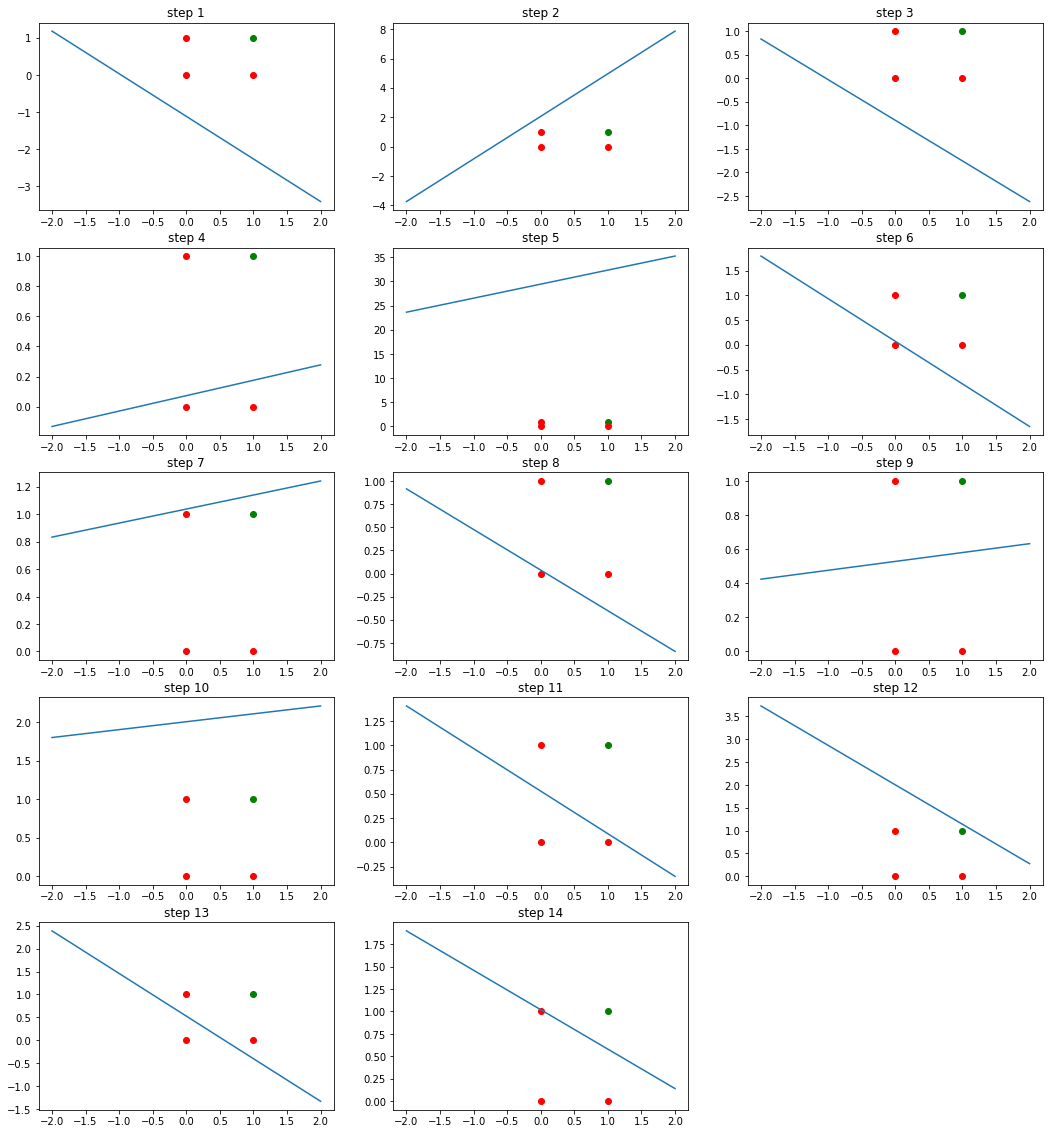

In [8]:
# set features and labels for AND
features_and = [(0, 0, 1), (1, 1, 1), (1, 0, 1), (0, 1, 1)]
labels_and = [-1, 1, -1, -1]

# plot decision boundary for AND
w_all_and = perceptron_algorithm(features_and, labels_and)
print(w_all_and)
draw_classifier(w_all_and, features_and, labels_and)   

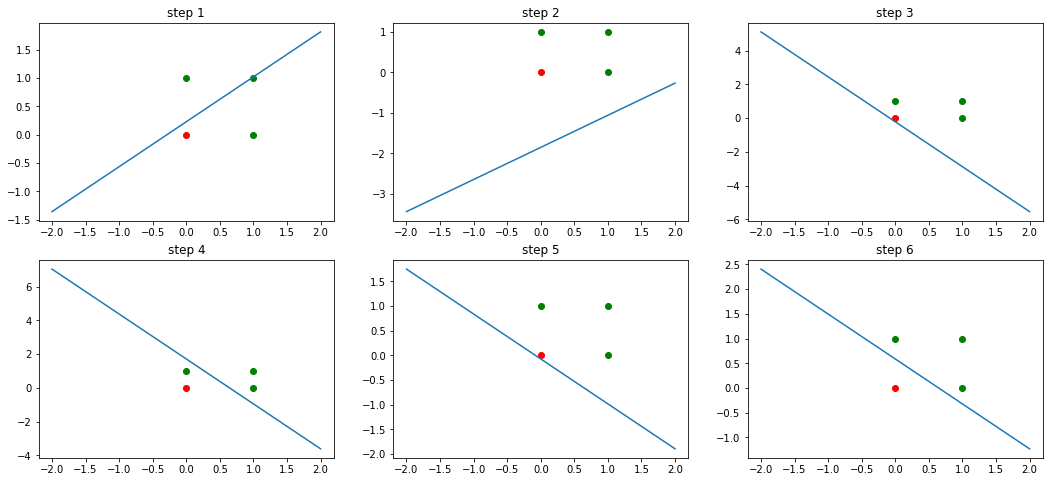

In [11]:
# set features and labels for OR
features_or = [(0, 0, 1), (1, 1, 1), (1, 0, 1), (0, 1, 1)]
labels_or = [-1, 1, 1, 1]

# plot decision boundary for OR
w_all_or = perceptron_algorithm(features_or, labels_or)
draw_classifier(w_all_or, features_or, labels_or) 

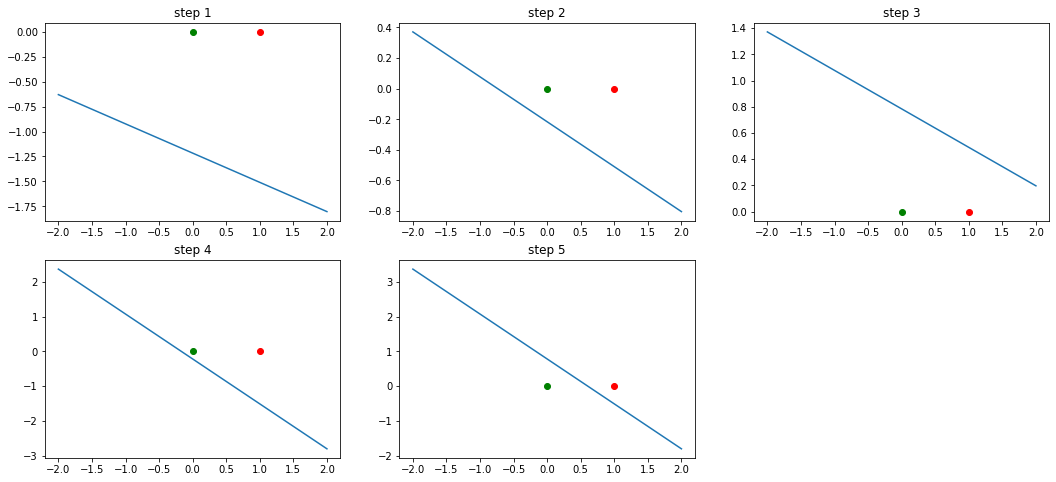

In [9]:
# set features and labels for NOT
features_not = [(1, 1), (0, 1)]
labels_not = [-1, 1]

# plot decision boundary for NOT
w_all_not = perceptron_algorithm(features_not, labels_not)
draw_classifier(w_all_not, features_not, labels_not)

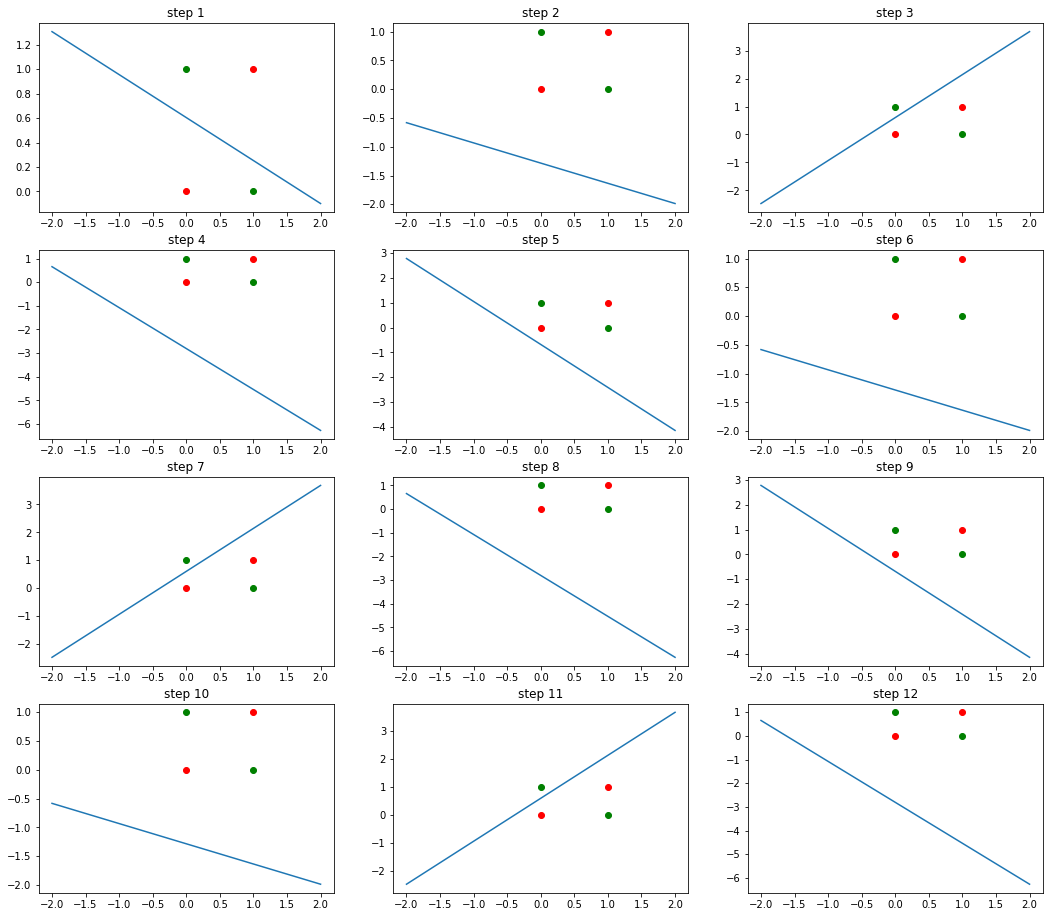

In [10]:
# set features and labels for XOR
features_xor = [(0, 0, 1), (1, 1, 1), (1, 0, 1), (0, 1, 1)]
labels_xor = [-1, -1, 1, 1]

# plot decision boundary for XOR
w_all_xor = perceptron_algorithm(features_xor, labels_xor, task="xor")
draw_classifier(w_all_xor, features_xor, labels_xor) 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time


class MLP():

    def __init__(self, X, Y, X_val, Y_val, L=1, N_l=128):
        self.X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
        self.Y = Y
        self.X_val = np.concatenate((X_val, np.ones((X_val.shape[0], 1))), axis=1)
        self.Y_val = Y_val
        self.L = L
        self.N_l = N_l
        self.n_samples = self.X.shape[0]
        self.layer_sizes = np.array([self.X.shape[1]]+[N_l]*L+[self.Y.shape[1]])
        self.__init_weights()
        self.train_loss = list()
        self.train_acc = list()
        self.val_loss = list()
        self.val_acc = list()
        self.train_time = list()
        self.tot_time = list()
        self.metrics = [self.train_loss, self.train_acc, self.val_loss, self.val_acc, self.train_time, self.tot_time]

        
  
    def sigmoid(self, x):
        return 1./(1.+np.exp(-x))

  
    def relu(self, x):
        return x * (x > 0)
        #return np.where(x > 0, x, x * 0.01)
        # return np.tanh(x)

    def relu_prime(self, x):
        return 1. * (x > 0)
        # return np.where(x < 0, .01, 1)
        # return 0.01 if x < 0 else 1
        #return 1.-np.tanh(x)**2
        # return

    def __softmax(self, x):
        # Compute softmax along the rows of the input
        # print("-----------------------------------------------------------")
        # print(x)
        # print("-----------------------------------------------------------")
        # temp = x.max(axis=1).reshape(-1,1)
        # x = x-temp
        exponent = np.exp(x)
        return exponent/exponent.sum(axis=1, keepdims=True)

    
    def __loss(self, y_pred, y):
        # Compute the loss along the rows, averaging along the number of samples
        if (y_pred.shape != y.shape):
            pass
        a = -np.log(y_pred)*y
        b = a.sum(axis=1)
        c = b.mean()
        return c
        # return ((-np.log(y_pred))*y).sum(axis=1).mean()

        
    def __accuracy(self, y_pred, y):
        # Compute the accuracy along the rows, averaging along the number of samples
        return np.all(y_pred == y, axis=1).mean()

    
    def sigmoid_prime(self, h):
        # Compute the derivative of sigmoid where h=sigmoid(x)
        return h*(1-h)

    
    def __to_categorical(self, x):
        # Transform probabilities into categorical predictions row-wise, by simply taking the max probability
        categorical = np.zeros((x.shape[0], self.Y.shape[1]))
        categorical[np.arange(x.shape[0]), x.argmax(axis=1)] = 1
        return categorical

    
    def __init_weights(self):
        # Initialize the weights of the network given the sizes of the layers
        self.weights = list()
        for i in range(self.layer_sizes.shape[0]-1):
            self.weights.append(np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]))
        self.weights = np.asarray(self.weights)

        
    def __init_layers(self, batch_size):
        # Initialize and allocate arrays for the hidden layer activations
        self.__h = [np.empty((batch_size, layer)) for layer in self.layer_sizes]

        
    def __feed_forward(self, batch):
        # Perform a forward pass of `batch` samples (N_samples x N_features)
        h_l = batch
        self.__h[0] = h_l
        for i, weights in enumerate(self.weights):
            # h_l = self.sigmoid(h_l.dot(weights))
            h_l = self.relu(h_l.dot(weights))
            self.__h[i+1] = h_l
        self.__out = self.__softmax(self.__h[-1])
        

    def __back_prop(self, batch_y):
        # Update the weights of the network through back-propagation
        # delta_t = (self.__out - batch_y)*self.sigmoid_prime(self.__h[-1])
        # delta_t = (self.__out - batch_y)*self.relu_prime(self.__h[-1])
        # for i in range(1,len(self.weights)+1):
        #     self.weights[-i]-=self.lr*(self.__h[-i-1].T.dot(delta_t))/self.batch_size
        #     # delta_t = self.sigmoid_prime(self.__h[-i-1])*(delta_t.dot(self.weights[-i].T))
        #     delta_t = self.relu_prime(self.__h[-i-1])*(delta_t.dot(self.weights[-i].T))

        
        # dL/d__OUT -- Eq4
        dOUT = list()
        for prediction, actual in zip(self.__out, batch_y):
            idx = np.argmax(actual)
            yc = prediction[idx]
            d__out = [0] * batch_y.shape[1]
            d__out[idx] = -1/yc
            d__out = np.array(d__out)
            dOUT.append(d__out)

        dOUT = np.array(dOUT)

        # d__OUT/dz2 -- Eq2
        dOUT_dZ2 = list()
        for prediction in self.__out:
            dout_dz2 = np.zeros([10, ])
            for i, val_i in enumerate(prediction):
                for j, val_j in enumerate(prediction):
                    if i == j:
                        dout_dz2[i] = val_j * (1-val_j)
                    else:
                        dout_dz2[i] = -1 * val_i * val_j
            dOUT_dZ2.append(dout_dz2)
        dOUT_dZ2 = np.array(dOUT_dZ2)
        dZ2 = np.multiply(dOUT_dZ2, dOUT)


        # dW2ij --Eq1
        dW2 = np.zeros([self.N_l, batch_y.shape[1]])
        dW2 = 1 / batch_y.shape[0] * np.dot(self.__h[1].T, dZ2) 
# 
#         for batch_num, sample in enumerate(self.__h[1]):
#             for i in range(self.N_l):
#                 for j in range(batch_y.shape[1]):
#                     dW2[i][j] += sample[i]*dZ2[batch_num][j]
        
        dW2 /= batch_y.shape[0]


        #dY1
        dY1 = np.zeros([batch_y.shape[0], self.N_l])
        for batch_num, sample in enumerate(dZ2):
            for i in range(self.N_l):
                for j in range(batch_y.shape[1]):
                    dY1[batch_num][i] += self.weights[-1][i][j] * dZ2[batch_num][j]


        #dZ1
        dZ1 = self.sigmoid_prime(self.__h[1]) * dY1


        #dW1
        dW1 = np.zeros([self.__h[0].shape[1], self.N_l])
        for batch_num, sample in enumerate(self.__h[0]):
            for i in range(self.__h[0].shape[1]):
                for j in range(self.N_l):
                    dW1[i][j] += sample[i] * dZ1[batch_num][j]
        
        dW1 /= batch_y.shape[0]


        self.weights[0] -= self.lr * dW1
        self.weights[1] -= self.lr * dW2

        return 0
    

    def predict(self, X):
        # Generate a categorical, one-hot, prediction given an input X
        X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
        self.__init_layers(X.shape[0])
        self.__feed_forward(X)
        return self.__to_categorical(self.__out)

    
    def evaluate(self, X, Y):
        # Evaluate the performance (accuracy) predicting on X with true labels Y
        prediction = self.predict(X)
        return self.__accuracy(prediction, Y)

    
    def train(self, batch_size=8, epochs=25, lr=0.01):
        # Train the model with a given batch size, epochs, and learning rate. Store and print relevant metrics.
        self.lr = lr
        self.batch_size = batch_size
        self.__init_layers(self.batch_size)
        for epoch in range(epochs):
            start = time.time()

            shuffle = np.random.permutation(self.n_samples)
            train_loss = 0
            train_acc = 0
            X_batches = np.array_split(
                self.X[shuffle], self.n_samples/self.batch_size)
            Y_batches = np.array_split(
                self.Y[shuffle], self.n_samples/self.batch_size)
            for batch_x, batch_y in zip(X_batches, Y_batches):
                self.__feed_forward(batch_x)
                train_loss += self.__loss(self.__out, batch_y)
                train_acc += self.__accuracy(
                    self.__to_categorical(self.__out), batch_y)
                self.__back_prop(batch_y)

            train_loss = (train_loss/len(X_batches))
            train_acc = (train_acc/len(X_batches))
            self.train_loss.append(train_loss)
            self.train_acc.append(train_acc)

            train_time = round(time.time()-start, 3)
            self.train_time.append(train_time)

            self.__init_layers(self.X_val.shape[0])
            self.__feed_forward(self.X_val)
            val_loss = self.__loss(self.__out, self.Y_val)
            val_acc = self.__accuracy(
                self.__to_categorical(self.__out), self.Y_val)
            self.val_loss.append(val_loss)
            self.val_acc.append(val_acc)

            tot_time = round(time.time()-start, 3)
            self.tot_time.append(tot_time)

            print(f"Epoch {epoch+1}: loss = {train_loss.round(3)} | acc = {train_acc.round(3)} | val_loss = {val_loss.round(3)} | val_acc = {val_acc.round(3)} | train_time = {train_time} | tot_time = {tot_time}")


if __name__ == '__main__':
    train_df = pd.read_csv("fashion-mnist_train.csv")
    test_df = pd.read_csv("fashion-mnist_test.csv")

    y_train_ = train_df["label"].to_numpy()
    y_test_ = test_df["label"].to_numpy()
    x_train = train_df.iloc[:, 1:].to_numpy()
    x_test = test_df.iloc[:, 1:].to_numpy()

    x_train = x_train/255.0
    x_test = x_test/255.0

    y_train = np.zeros((y_train_.size, int(y_train_.max()) + 1))
    y_train[np.arange(y_train_.size), y_train_.astype(np.int)] = 1.0
    y_test = np.zeros((y_test_.size, int(y_test_.max())+1))
    y_test[np.arange(y_test_.size), y_test_.astype(np.int)] = 1.0

    x_train = x_train[:10000, :]
    y_train = y_train[:10000, :]
    x_test = x_test[:1000, :]
    y_test = y_test[:1000, :]

    model = MLP(x_train, y_train, x_test, y_test, L=1, N_l=128)
    model.train(batch_size=16, epochs=25, lr=0.0001)

C:\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: overflow encountered in exp
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in log
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in multiply
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:123: RuntimeWarning: divide by zero encountered in double_scalars
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:142: RuntimeWarning: invalid 

KeyboardInterrupt: 